In [1]:
from Engine import Engine
from Environment import Environment

In [2]:
size = (8,8)
goal_reward  = 1000
fail_penalty = -100
time_penalty = -1
outOfBoundsList = [(x,1) for x in range(3)]
for i in range(4):
    outOfBoundsList += [(x,5-i) for x in range(4+i,8)]
for i in range(3):
    outOfBoundsList += [(x,7-i) for x in range(3-i)]
goalList = [(7,6)]

env = Environment(size,goal_reward,fail_penalty,time_penalty,outOfBoundsList,goalList)
engine = Engine(env)

engine.Env.df.sample(10)

,STATE_0,ACTION,STATE_1,TERMINAL,REWARD,Q
40065,"(2, 1, -2, -5)","(1, -1)","(1, -5, -1, -6)",True,-100.0,0.0
133142,"(7, 1, 4, 1)","(0, 1)","(11, 3, 4, 2)",True,-100.0,0.0
91369,"(4, 7, 2, 0)","(-1, 0)","(5, 7, 1, 0)",False,-1.0,0.0
136450,"(7, 3, -5, 1)","(-1, 0)","(1, 4, -6, 1)",True,-100.0,0.0
61961,"(3, 2, 6, -4)","(0, 1)","(9, -1, 6, -3)",True,-100.0,0.0
34941,"(1, 7, -6, 2)","(0, -1)","(-5, 8, -6, 1)",True,-100.0,0.0
144998,"(7, 6, 6, 6)","(1, 1)","(14, 13, 7, 7)",True,-100.0,0.0
69947,"(3, 6, -3, 3)","(1, 1)","(1, 10, -2, 4)",True,-100.0,0.0
87509,"(4, 5, 7, 3)","(-1, 1)","(10, 9, 6, 4)",True,-100.0,0.0
106963,"(5, 6, -2, 4)","(1, 0)","(4, 10, -1, 4)",True,-100.0,0.0


In [ ]:
"""
WITH t1 AS (
    SELECT state_0, action, state_1, reward
    FROM state_table
), t2 AS (
    SELECT state_0, MAX(Q) as Qmax
    FROM state_table
)
SELECT t1.state_0, action, state_1, reward,
    IFNULL(reward+gamma*Qmax,Rmin) AS Q
FROM t1 LEFT JOIN t2
ON t1.state_1 = t2.state_0
"""

In [ ]:
for i in range(trials):
    session.sql(
        """
        CREATE OR REPLACE TABLE state_table AS (
            SELECT t1.state_0, action, state_1, reward,
                IFNULL(reward+gamma*Qmax,Rmin) AS Q
            FROM (
                SELECT state_0, action, state_1, reward
                FROM state_table
            ) t1
            LEFT JOIN (
                SELECT state_0, MAX(Q) as Qmax
                FROM state_table
            ) t2
            ON t1.state_1 = t2.state_0
        )
        """
    )
    if not changing a bunch then kill

DQN Dynamic Programming Approach Deployed in Snowflake

S,A,S'

In [ ]:
for i in range(iterations):
    Qmax = self.Env.df[["STATE_1"]].merge(self.Env.df.groupby('STATE_0').Q.max(),
                      left_on="STATE_1",
                      right_index=True,how="left").Q.fillna(self.Env.fail_penalty)
    self.Env.df.Q = self.Env.df.REWARD + gamma*Qmax*(1-self.Env.df.TERMINAL)
    print(f"Iteration:{i}, Avg Q-val:{self.Env.df.Q.mean()}")

In [3]:
engine.train(15,gamma = .99)

Iteration:0, Avg Q-val:-91.70979139539931
Iteration:1, Avg Q-val:-95.1867823621962
Iteration:2, Avg Q-val:-93.88035457899304
Iteration:3, Avg Q-val:-91.57392695588514
Iteration:4, Avg Q-val:-87.94493052238174
Iteration:5, Avg Q-val:-82.29567324400881
Iteration:6, Avg Q-val:-75.12505967556751
Iteration:7, Avg Q-val:-69.70842855454204
Iteration:8, Avg Q-val:-66.22606482049179
Iteration:9, Avg Q-val:-64.38743293859356
Iteration:10, Avg Q-val:-63.17316310912314
Iteration:11, Avg Q-val:-63.06386888863257
Iteration:12, Avg Q-val:-63.06386888863257
Iteration:13, Avg Q-val:-63.06386888863257
Iteration:14, Avg Q-val:-63.06386888863257


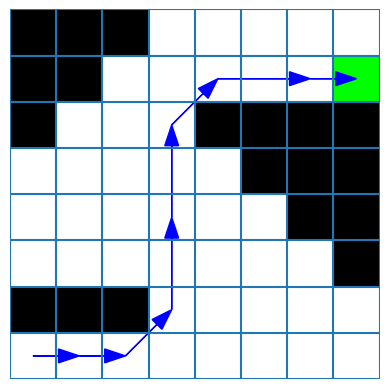

In [4]:
engine.display_run((0,0,0,0))